# Clasificación Gold Card

El banco hace una cuidadosa inspección de sus clientes al momento de emitir una tarjeta de tipo Gold, ya que la misma posee numerosos requerimientos de mantención. Las personas que no cumplan con dichos requerimientos tras recibir una tarjeta de este tipo, resultarían en una pérdida para el banco.

<p>El siguente algoritmo de Machine Learning nos permitirá reducir este análisis de las cualidades que debe tener una persona para que esta sea verdaderamente merecedora de una tarjeta Gold.</p>
<p>El algoritmo de ML utilizado es de Clasificación, puntualmente un árbol de decisión. Como entrada del algoritmo tenemos los datos de las transacciones que han hecho los clientes, las cuentas de estos, los tipos de transacciones que se hicieron, las fechas, y por último los distritos. </p>

### Importación de paquetes y datos


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
operations_df = pd.read_csv('./merged_operations.csv')

Contamos la cantidad de transacciones que se han hecho desde cada cuenta, el monto total de las mismas



In [3]:
transaction_data = operations_df[operations_df['type'] == 'Transaccion']
transaction_data

Unnamed: 0  operation_id  type_id  date_id  receiver  client_id  \
1                 1         35634       27       14         1      13845   
2                 2         35729       27       36         1      13845   
3                 3         35818       27       44         1      13845   
4                 4         35950       27       64         1      13845   
5                 5         36264       27       95         1      13845   
...             ...           ...      ...      ...       ...        ...   
1039481     1039481        678144       32     1968         1       2631   
1039482     1039482        697923       32     2087         1       2631   
1039483     1039483        138766       27     1758         1       2631   
1039484     1039484        142335       27     1788         1       2631   
1039485     1039485        668881       32     1908         1       2631   

         district_id_x  client_district_id  amount  amount_avg  ...  \
1                   15                  15    1000        1000  ...   
2                   15                  15    7618        7618  ...   
3                   15                  15    9800        9800  ...   
4                   15                  15    7618        7618  ...   
5                   15                  15    7618        7618  ...   
...                ...                 ...     ...         ...  ...   
1039481             18                  18   32000       32000  ...   
1039482             18                  18   14700       14700  ...   
1039483             18                  18     400         400  ...   
1039484             18                  18   14200       14200  ...   
1039485             18                  18     200         200  ...   

         average_unemployment_rate average_crime_rate district_id gender age  \
1                            3.365           0.031669          15   MALE  26   
2                            3.365           0.031669          15   MALE  26   
3                            3.365           0.031669          15   MALE  26   
4                            3.365           0.031669          15   MALE  26   
5                            3.365           0.031669          15   MALE  26   
...                            ...                ...         ...    ...  ..   
1039481                      3.090           0.025814          18   MALE  29   
1039482                      3.090           0.025814          18   MALE  29   
1039483                      3.090           0.025814          18   MALE  29   
1039484                      3.090           0.025814          18   MALE  29   
1039485                      3.090           0.025814          18   MALE  29   

         age_levels card_num  card_type  card_emission_date  account_owner  
1             ADULT      NaN         No                 NaN          OWNER  
2             ADULT      NaN         No                 NaN          OWNER  
3             ADULT      NaN         No                 NaN          OWNER  
4             ADULT      NaN         No                 NaN          OWNER  
5             ADULT      NaN         No                 NaN          OWNER  
...             ...      ...        ...                 ...            ...  
1039481       ADULT      NaN         No                 NaN          OWNER  
1039482       ADULT      NaN         No                 NaN          OWNER  
1039483       ADULT      NaN         No                 NaN          OWNER  
1039484       ADULT      NaN         No                 NaN          OWNER  
1039485       ADULT      NaN         No                 NaN          OWNER  

[1038804 rows x 57 columns]

Creamos una columna de fecha, uniendo valores de las columnas de año,mes y día

In [12]:
operations_df['date_acc'] = pd.to_datetime(operations_df['date_acc'])

In [13]:
operations_df['date_loan']=operations_df[['year_val','month_val','day_val']].apply(lambda x:'-'.join(x.values.astype(str)),axis='columns')
operations_df['date_loan'] = pd.to_datetime(operations_df['date_loan'])

In [14]:
operations_df['days_between'] = (operations_df['date_loan']-operations_df['date_acc']).dt.days

In [15]:
operations_df['entrepreneur_rate'] = operations_df['entrepreneur_num1000']

In [16]:
operations_df

Unnamed: 0  operation_id  type_id  date_id  receiver  client_id  \
0                 0             1        1      258         1      13845   
1                 1         35634       27       14         1      13845   
2                 2         35729       27       36         1      13845   
3                 3         35818       27       44         1      13845   
4                 4         35950       27       64         1      13845   
...             ...           ...      ...      ...       ...        ...   
1039481     1039481        678144       32     1968         1       2631   
1039482     1039482        697923       32     2087         1       2631   
1039483     1039483        138766       27     1758         1       2631   
1039484     1039484        142335       27     1788         1       2631   
1039485     1039485        668881       32     1908         1       2631   

         district_id_x  client_district_id  amount  amount_avg  ...  gender  \
0                   15                  15   52788       52788  ...    MALE   
1                   15                  15    1000        1000  ...    MALE   
2                   15                  15    7618        7618  ...    MALE   
3                   15                  15    9800        9800  ...    MALE   
4                   15                  15    7618        7618  ...    MALE   
...                ...                 ...     ...         ...  ...     ...   
1039481             18                  18   32000       32000  ...    MALE   
1039482             18                  18   14700       14700  ...    MALE   
1039483             18                  18     400         400  ...    MALE   
1039484             18                  18   14200       14200  ...    MALE   
1039485             18                  18     200         200  ...    MALE   

        age age_levels card_num card_type  card_emission_date account_owner  \
0        26      ADULT      NaN        No                 NaN         OWNER   
1        26      ADULT      NaN        No                 NaN         OWNER   
2        26      ADULT      NaN        No                 NaN         OWNER   
3        26      ADULT      NaN        No                 NaN         OWNER   
4        26      ADULT      NaN        No                 NaN         OWNER   
...      ..        ...      ...       ...                 ...           ...   
1039481  29      ADULT      NaN        No                 NaN         OWNER   
1039482  29      ADULT      NaN        No                 NaN         OWNER   
1039483  29      ADULT      NaN        No                 NaN         OWNER   
1039484  29      ADULT      NaN        No                 NaN         OWNER   
1039485  29      ADULT      NaN        No                 NaN         OWNER   

         date_loan  days_between  entrepreneur_rate  
0       1993-09-15           244                124  
1       1993-01-14             0                124  
2       1993-02-05            22                124  
3       1993-02-13            30                124  
4       1993-03-05            50                124  
...            ...           ...                ...  
1039481 1998-05-22           210                131  
1039482 1998-09-18           329                131  
1039483 1997-10-24             0                131  
1039484 1997-11-23            30                131  
1039485 1998-03-23           150                131  

[1039486 rows x 60 columns]

### Modelado de los datos
<p>Aquí nos quedamos solo con las features que usaremos para este modelo, descartando el resto.</p>

In [21]:
df_ml = operations_df[['inhabitants_num','medium_salary','average_unemployment_rate',
                     'entrepreneur_rate','average_crime_rate','age','quantity_y','card_type','gender']]

In [22]:
df_ml.tail()

inhabitants_num  medium_salary  average_unemployment_rate  \
1039481            70699           8968                       3.09   
1039482            70699           8968                       3.09   
1039483            70699           8968                       3.09   
1039484            70699           8968                       3.09   
1039485            70699           8968                       3.09   

         entrepreneur_rate  average_crime_rate  age  quantity_y card_type  \
1039481                131            0.025814   29          54        No   
1039482                131            0.025814   29          54        No   
1039483                131            0.025814   29          54        No   
1039484                131            0.025814   29          54        No   
1039485                131            0.025814   29          54        No   

        gender  
1039481   MALE  
1039482   MALE  
1039483   MALE  
1039484   MALE  
1039485   MALE

Como el objetivo es predecir si una persona puede acceder a una tarjeta gold o no, se crea una columna booleana **gold_card**, la cual indica si el cliente tiene una tarjeta de este tipo.

In [23]:
df_ml['gold_card'] = df_ml['card_type']=='gold'

/home/facu/anaconda3/envs/bienv/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [24]:
df_ml['gold_card'].value_counts()

False    1014260
True       25226
Name: gold_card, dtype: int64

In [25]:
df_ml.drop(['card_type'],axis=1,inplace=True)

/home/facu/anaconda3/envs/bienv/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Se extrae una muestra del dataset, que se almacenará como un nuevo dataset llamado **data_unseen**. Con este dataset, podemos correr luego la funcion **predict_model()**, con data que el modelo no haya visto. Cabe destacar que esto difiere de la separación train/test, ya que se trata de un conjunto de datos que el modelo nunca vió, y que se usará para evaluarlo.

In [26]:
data = df_ml.sample(frac=0.95)
data_unseen = df_ml.drop(data.index)
data.reset_index(inplace=True,drop=True)
data_unseen.reset_index(inplace=True,drop=True)
print('Data para el modelo: ' + str(data.shape))
print('Data para predicciones,no vista por el modelo: ' + str(data_unseen.shape))

Data para el modelo: (987512, 9)
Data para predicciones,no vista por el modelo: (51974, 9)


### Creacion del modelo de ML

In [27]:
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

<p>Separamos variables numéricas y categóricas.</p>

In [28]:
num_cols = df_ml.columns[:-2]
cat_cols = df_ml.columns[-2:]

In [29]:
cat_cols

Index(['gender', 'gold_card'], dtype='object')

Se aplica un encoding para transformar la variables categorias a valores numéricos.

In [30]:
catcols_transformed = df_ml[cat_cols].apply(LabelEncoder().fit_transform)

In [31]:
df_transformed = pd.concat([df_ml[num_cols],catcols_transformed],axis=1)

In [32]:
df_transformed.head()

inhabitants_num  medium_salary  average_unemployment_rate  \
0            58796           9045                      3.365   
1            58796           9045                      3.365   
2            58796           9045                      3.365   
3            58796           9045                      3.365   
4            58796           9045                      3.365   

   entrepreneur_rate  average_crime_rate  age  quantity_y  gender  gold_card  
0                124            0.031669   26         485       1          0  
1                124            0.031669   26         485       1          0  
2                124            0.031669   26         485       1          0  
3                124            0.031669   26         485       1          0  
4                124            0.031669   26         485       1          0

De la misma manera,aplicamos el encoding para el dataset **data_unseen**

In [33]:
data_unseen_cats_transformed=data_unseen[cat_cols].apply(LabelEncoder().fit_transform)

In [34]:
data_unseen = pd.concat([data_unseen[num_cols],data_unseen_cats_transformed],axis=1)

In [35]:
data_unseen.head()

inhabitants_num  medium_salary  average_unemployment_rate  \
0            58796           9045                      3.365   
1            58796           9045                      3.365   
2            58796           9045                      3.365   
3            58796           9045                      3.365   
4            58796           9045                      3.365   

   entrepreneur_rate  average_crime_rate  age  quantity_y  gender  gold_card  
0                124            0.031669   26         485       1          0  
1                124            0.031669   26         485       1          0  
2                124            0.031669   26         485       1          0  
3                124            0.031669   26         485       1          0  
4                124            0.031669   26         485       1          0

Se configura el modelo de clasificación con la librería pycaret. Para esto, se pasa como parámetro el dataset a utilizar y la variable que queremos predecir. 

In [36]:
exp_clf = setup(data = df_transformed,target='gold_card',numeric_features=['gender'])

AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

### Comparación de los resultados de los distintos algoritmos
<p>La librería Pycaret nos ofrece un proceso para comparar los distintos algoritmos de ML mediante la siguente tabla, donde se presentan los indicadores de cada algoritmo, para así poder discernir entre cuál de ellos es el más óptimo para este caso. </p>
<p>En este caso, se optará por la utilización del modelo de clasificación de árbol de Decisión.</p>

In [51]:
compare_models()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4704, verbose=0,
                       warm_start=False)

## Creación del modelo
Utilizamos el modelo **decision tree** ya que, a pesar de no ser el mejor según la comparación de modelos, resulta lo suficientemente útil para este caso, y es considerablemente más rápido que el modelo de **Extra trees classifier**

In [37]:
dt = create_model('dt')

## Gráficas del Modelo
### Precision-Recall

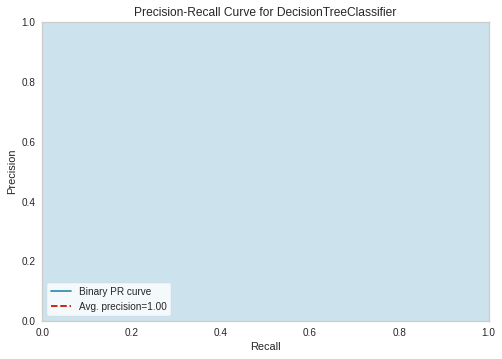

In [38]:
plot_model(dt,plot='pr')

### Matriz de Confusión

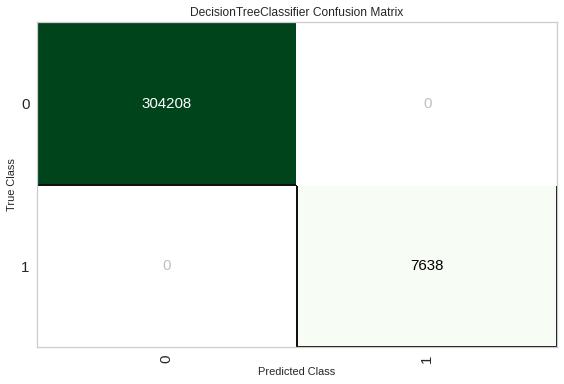

In [39]:
plot_model(dt,plot='confusion_matrix')

### Curva ROC

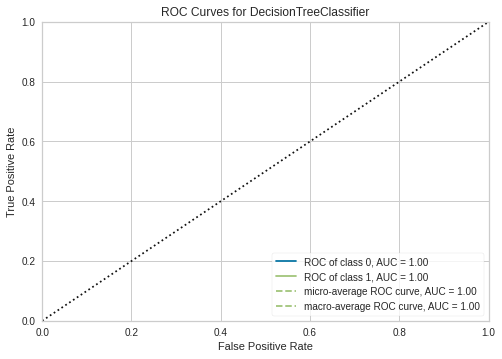

In [40]:
plot_model(dt,plot='auc')

### Gráfico Threshold

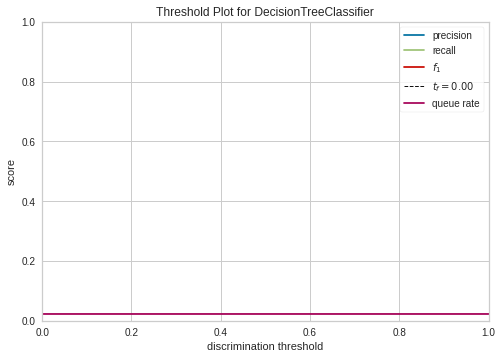

In [41]:
plot_model(dt,plot='threshold')

### Error en predicción de clases

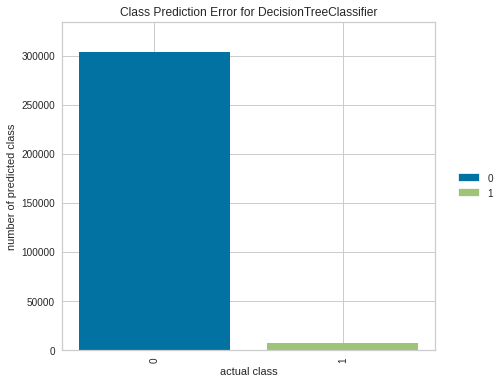

In [42]:
plot_model(dt,plot='error')

### Reporte de clasificación

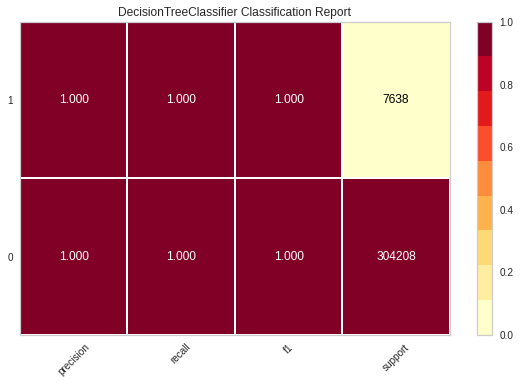

In [43]:
plot_model(dt,plot='class_report')

### Curva de Aprendizaje

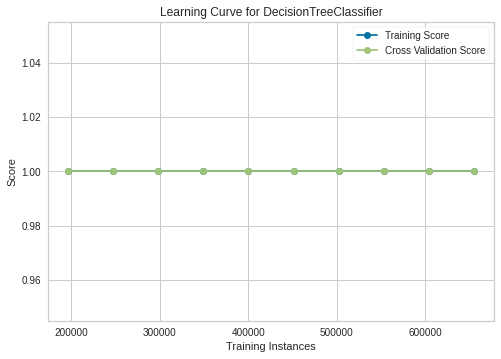

In [44]:
plot_model(dt,plot='learning')

### Features más importantes para el modelo

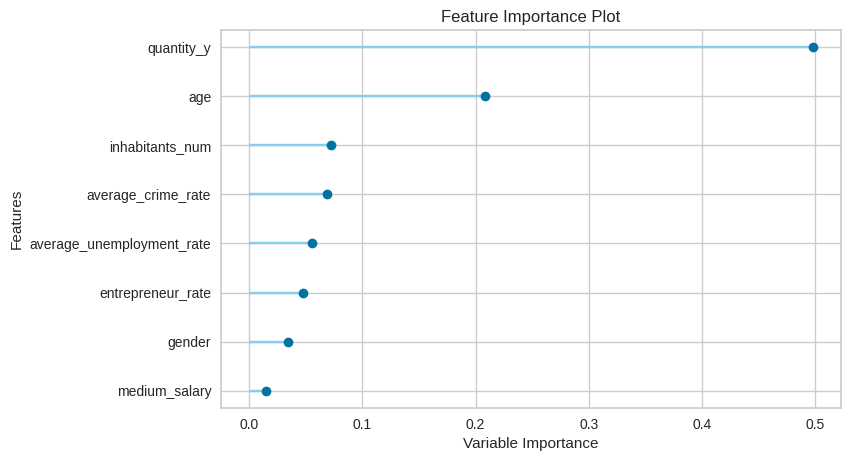

In [45]:
plot_model(dt,plot='feature')

### Predicción en dataset de test
Al setear el modelo, se separa la data en train y test. El total de registros era de 987512, y se dividió la data de la siguiente manera <br/>
**Train set**: (691258, 10) <br/>
**Original Data**: (987512, 11) <br/>
**Test set**: (296254, 10) <br/>
Ahora se realiza la predicción para el dataset de test

In [46]:
dt_predictions_holdout = predict_model(dt)

### Predicción en data no vista
Ahora se realiza la predicción para el conjunto de data que se guardó de manera separada, y que el modelo no ha visto.

In [47]:
unseen_predictions = predict_model(dt, data=data_unseen)

In [48]:
unseen_predictions.head()

inhabitants_num  medium_salary  average_unemployment_rate  \
0            58796           9045                      3.365   
1            58796           9045                      3.365   
2            58796           9045                      3.365   
3            58796           9045                      3.365   
4            58796           9045                      3.365   

   entrepreneur_rate  average_crime_rate  age  quantity_y  gender  gold_card  \
0                124            0.031669   26         485       1          0   
1                124            0.031669   26         485       1          0   
2                124            0.031669   26         485       1          0   
3                124            0.031669   26         485       1          0   
4                124            0.031669   26         485       1          0   

   Label  Score  
0      0    1.0  
1      0    1.0  
2      0    1.0  
3      0    1.0  
4      0    1.0

In [49]:
unseen_predictions['Label']=unseen_predictions['Label'].map(lambda x: 1 if x else 0)

Se obtiene el accuracy para el conjunto de datos no vistos por el modelo

In [50]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['gold_card'], unseen_predictions['Label'], metric = 'Accuracy')

1.0